In [152]:
!pip install gurobipy

#P1


In [153]:
#Antes de comenzar a realizar el problema de optimización, voy a definir definir la matriz D:

In [154]:
import numpy as np #importamos la libreria de numpy para manejar matrices.

In [155]:
#definamos la matriz D de la siguiente manera:

D = np.array([[4,6,5,9,17,4],[8,12,3,7,11,5],[6,8,2,10,15,7],[5,9,4,8,13,6],
 [7,11,3,12,8,10],[10,5,6,4,9,7]])
print(D)
np.shape(D) #para comprobar la dimensión de la matriz


print(D[0,0])

[[ 4  6  5  9 17  4]
 [ 8 12  3  7 11  5]
 [ 6  8  2 10 15  7]
 [ 5  9  4  8 13  6]
 [ 7 11  3 12  8 10]
 [10  5  6  4  9  7]]
4


In [156]:
#primero voy a sacar los esfuerzos que requiere cada robot para mover cada objeto:
R1 = D[:,0]
R2 = D[:,1]
R3 = D[:,2]
R4 = D[:,3]
R5 = D[:,4]
R6 = D[:,5]

#ahora colocare todas las combinaciones posibles para cada robot donde cada robot se le asigna un solo objeto

movimiento = [np.array([R1[a], R2[b], R3[c], R4[d], R5[e], R6[f]]) for a in range(len(R1)) for b in range(len(R2)) for c in range(len(R3))
                  for d in range(len(R4)) for e in range(len(R5)) for f in range(len(R6))  if a != b and a != c and a != d
                and a != e and a != f and b != c and b != d and b != e and b != f and c != d and c != e and c != f and d != e and d != f and e != f]

                #ESTA CELDA LA VOY A BORRAR PORUQE NO LA USE, PERO LA DEJO SI TE SIRVE PARA ALGO EN OTRA PREGUNTA, LO QUE HACE ES SACAR TODAS LAS PERMUTACIONES POSIBLES


In [157]:
#ahora usaremos gurobi para optimizar el problema:
from gurobipy import*

D = D = np.array([[4,6,5,9,17,4],[8,12,3,7,11,5],[6,8,2,10,15,7],[5,9,4,8,13,6],
 [7,11,3,12,8,10],[10,5,6,4,9,7]])


n = D.shape[0] # numeros de elemento de elementos de objetos que coincide con el numero de robots

model = Model("Robots_Trabajadores")
model.setParam('OutputFlag',0)

#definamos las varaibles del modelos

#como vamos a trabajar con variables binarias, se tiene que x_{i,j} toma valores {0,1} segun las condiciones colocadas en el informe.

x = model.addVars(n,n, vtype=GRB.BINARY, name = 'x')

tanh_D= np.tanh(D-5)

model.update()
#Definimos la función objetivo:

model.setObjective(quicksum(x[i,j]*(50000*tanh_D[i,j] + 50000) for i in range(n) for j in range(n)), GRB.MINIMIZE)


#restricciones:

for i in range(n):
  model.addConstr(quicksum(x[i,j] for j in range(n)) == 1, name = f'restriccion_robot_{i}')

for j in range(n):
  model.addConstr(quicksum(x[i,j] for i in range(n)) == 1, name = f'restriccion_robot_{j}')

model.optimize()

costo_final = 0
for i in range(n):
    for j in range(n):
        if x[i, j].X > 0.5:
            costo = 50000 * tanh_D[i, j] + 50000
            costo_final += costo
            print(f"Robot {i} asignado a tarea {j} con costo {costo:.2f}")

print(f"\nCosto total de la asignación: {costo_final:.2f}")


Robot 0 asignado a tarea 0 con costo 11920.29
Robot 1 asignado a tarea 5 con costo 50000.00
Robot 2 asignado a tarea 2 con costo 247.26
Robot 3 asignado a tarea 1 con costo 99966.46
Robot 4 asignado a tarea 4 con costo 99752.74
Robot 5 asignado a tarea 3 con costo 11920.29

Costo total de la asignación: 273807.05


#P2


In [ ]:
#@title Funciones útiles (no editar)
import numpy as np
import matplotlib.pyplot as plt

def generador_puntos_separados(n,seed=42):

  np.random.seed(seed)
  group1 = np.random.randn(n, 2)
  group2 = np.random.randn(n, 2) + [4, 4]
  X = np.vstack([group1, group2])
  y = np.hstack([np.zeros(n)-1, np.ones(n)])
  return X,y

def generador_puntos_mezclados(n,seed=42):
  np.random.seed(seed)
  group1 = np.random.randn(n, 2)
  group2 = np.random.randn(n, 2) + [1,2]
  X = np.vstack([group1, group2])
  y = np.hstack([np.zeros(n)-1, np.ones(n)])
  return X,y

def graficar(X,y,w=None,b=None):
  plt.figure(figsize=(8, 6))
  if w is not None and b is not None:
    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]),100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'k-', label='Hiperplano separante')

  group1 = X[y == -1]
  group2 = X[y == 1]
  plt.scatter(group1[:, 0], group1[:, 1], color='blue', label='Group 1')
  plt.scatter(group2[:, 0], group2[:, 1], color='red', label='Group 2')


  # Add titles and labels
  plt.title('Separación de dos grupos')
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.legend()
  plt.show()

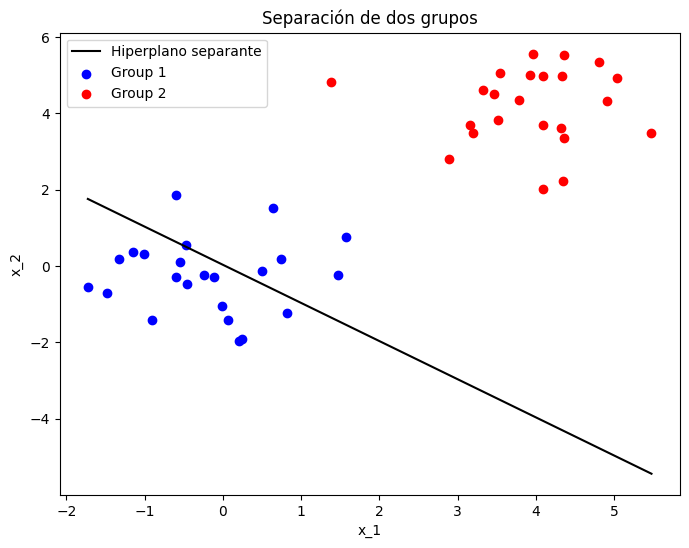

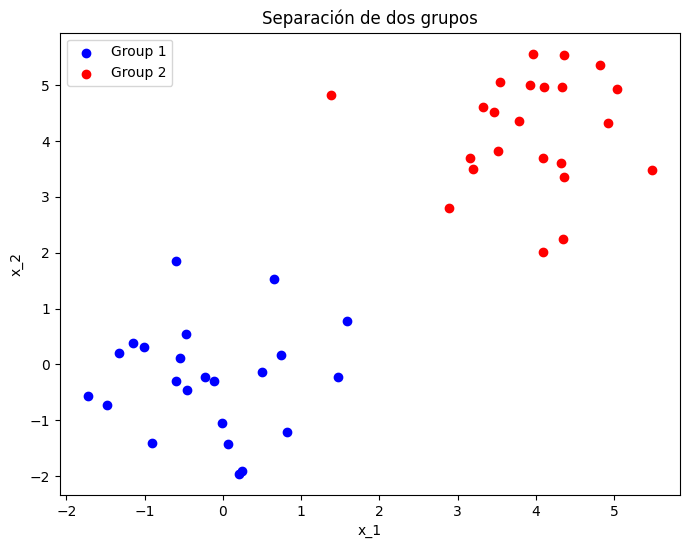

In [ ]:
#Ejemplo:
X,y=generador_puntos_separados(23)
graficar(X,y,(3,3),-0.1) # Con hiperplano
graficar(X,y) # Sin hiperplano

## b)


In [ ]:
from gurobipy import*

In [ ]:
#para esta parte es mejor utilizar el problema de minimización, donde minimizartemos min w,b 0,5||w||^2
#sujeto a w^t x_i + b >= 1

In [ ]:
def SVM_Hard(X,y):
  #detectamos la dimensión de X:
  n,d = X.shape #Esto entregara el numero de muestra y además la dimensión del vector.

  model = Model("SVM_Hard")
  model.setParam('OutputFlag',0)

  #ahora debemos definir las variables:
  #dado que el problema está minimizando dos variables, w y b necesitamos definir dos variables

  w = model.addVars(d, lb =- GRB.INFINITY, name = 'w') #w tiene que ser de dimención d puesto que x lo es
  b = model.addVar(lb = -GRB.INFINITY, name = 'b') # Dado que se realiza un producto punto en la restricción este es de dimención 1

  model.update() #guardamos las actualizaciones del modelo.

  #función objetivo:

  model.setObjective(quicksum(w[j]*w[j] for j in range(d)) * 0.5, GRB.MINIMIZE)
  #esto minimiza la funcion objetivo que planteamos en a).

  #aplicamos la restriccion:

  for i in range(n):
      model.addConstr( y[i] * (quicksum(w[j]*X[i, j] for j in range(d)) + b) >= 1,name=f"margin_{i}")

  #Optimizamos:
  model.optimize()

  w_optimo = np.array([w[j].x for j in range(d)])
  b_optimo = b.x

  return w_optimo, b_optimo


In [ ]:
#Ejemplo
X, y = generador_puntos_separados(100)
w, b = SVM_Hard(X, y)
print (w)
print (b)

[1.39468639 2.24195681]
-6.729388517937449


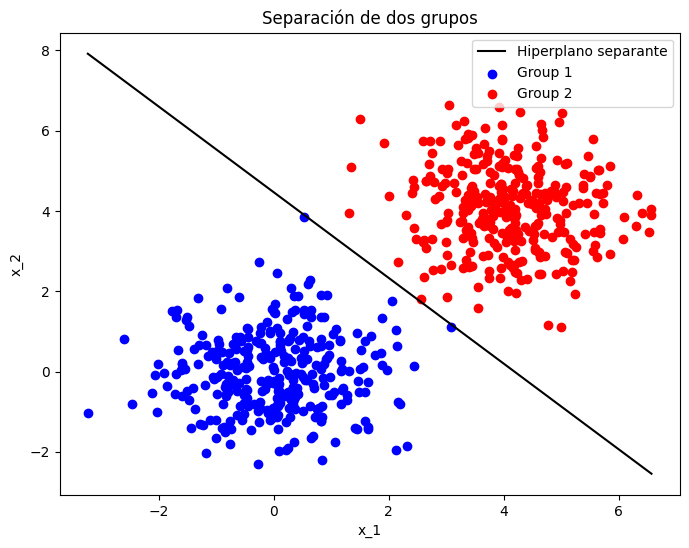

In [ ]:
X, y = generador_puntos_separados(320)
w, b = SVM_Hard(X, y)
graficar(X,y,w,b)

##d)

In [ ]:
def SVM_soft(X,y,Lamda):
  #Lamda es la variable de olgura, es cuanto penalizamos las malas clasificaciones
  n,d = X.shape
  model = Model('SVM_soft')
  model.setParam('OutputFlag',0)
  #Deminimos las variables sobre las cuales se va a optimizar el modelo.
  w = model.addVars(d, lb = -GRB.INFINITY, name = 'w')
  b = model.addVar(lb = -GRB.INFINITY, name = 'b')
  o = model.addVars(n, lb=0 , name = 'o') #Este parametro nos permitira definir si está mal clasificado
  model.update()

  #Planteamos la función objetivo:
  model.setObjective(quicksum(w[j]*w[j] for j in range(d)) * 0.5 + Lamda*quicksum(o[i] for i in range(n)), GRB.MINIMIZE)

  #planteamos las restricciones

  for i in range(n):
        model.addConstr( y[i] * (quicksum(w[j]*X[i, j] for j in range(d)) + b) >= 1 - quicksum(o[i] for i in range(n)),name=f"margin_{i}")

  #Optimizamos el modelo:
  model.optimize()

  w_optimo = np.array([w[j].x for j in range(d)])
  b_optimo = b.x

  return w_optimo, b_optimo


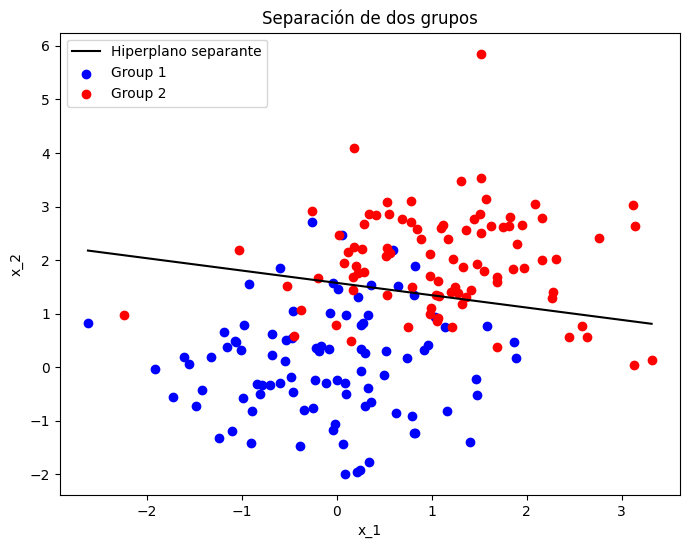

In [ ]:
X, y = generador_puntos_mezclados(92)
w, b = SVM_soft(X, y, 0.01)
graficar(X,y,w,b)